# Welcome to the Data Generation Notebook

### Run this Notebook to Store CSV's - i will store more than 1 CSV and adjust everyone for the needs of the Model which will perform on it
CSV:
1. Frequency Analysis (most drawn)
2. Cold Numbers (least drawn)
3. Numbers Longest not drawed
4. 
5. 
6. 

# Data Collection and CSV Creation + Cleaning

In [12]:
# Import Libraries needed
import pandas as pd
import matplotlib.pyplot as plt


### Get the Data from Johannesfriedrich on Github! Thanks for Providing them in JSON Format and always refresh the Set 

- There are 2 Version of the Data you can get i will load data_json and do my own Data Cleaning and EDA
- The first Version seems not to have the "Superzahl" thats why i clean and Shape the Data by myself

In [13]:
data_json_1 = "https://johannesfriedrich.github.io/LottoNumberArchive/Lottonumbers_tidy_complete.json"
data_json = "https://johannesfriedrich.github.io/LottoNumberArchive/Lottonumbers_complete.json"

In [14]:

# read in the json file from the provided URL
df = pd.read_json(data_json)

### Normalize the data because only 1 column "data" which holds dictionaries

In [15]:
# normalize the json file into columns

df = pd.json_normalize(df['data'])

### Superzahl was Introduced in the 2000's so i will make a 2nd Dataframe only with drawings which contained the Superzahl

In [16]:
df_superzahl = df.dropna(subset=["Superzahl"])


### Write the Data into a CSV called frequency_data and Store 1 CSV named superzahl


In [17]:
# Store the CSV for the Frequency Analysis
df.to_csv("../data/frequency_data.csv", index = False)
df_superzahl.to_csv("../data/superzahl_data.csv", index= False)


In [18]:
lotto_numbers = df["Lottozahl"].explode().astype(int)
number_counts = lotto_numbers.value_counts().sort_values(ascending=False)

# Count the occurrences of each Superzahl
superzahl_counts = df['Superzahl'].dropna().astype(int).value_counts().sort_values(ascending=False)

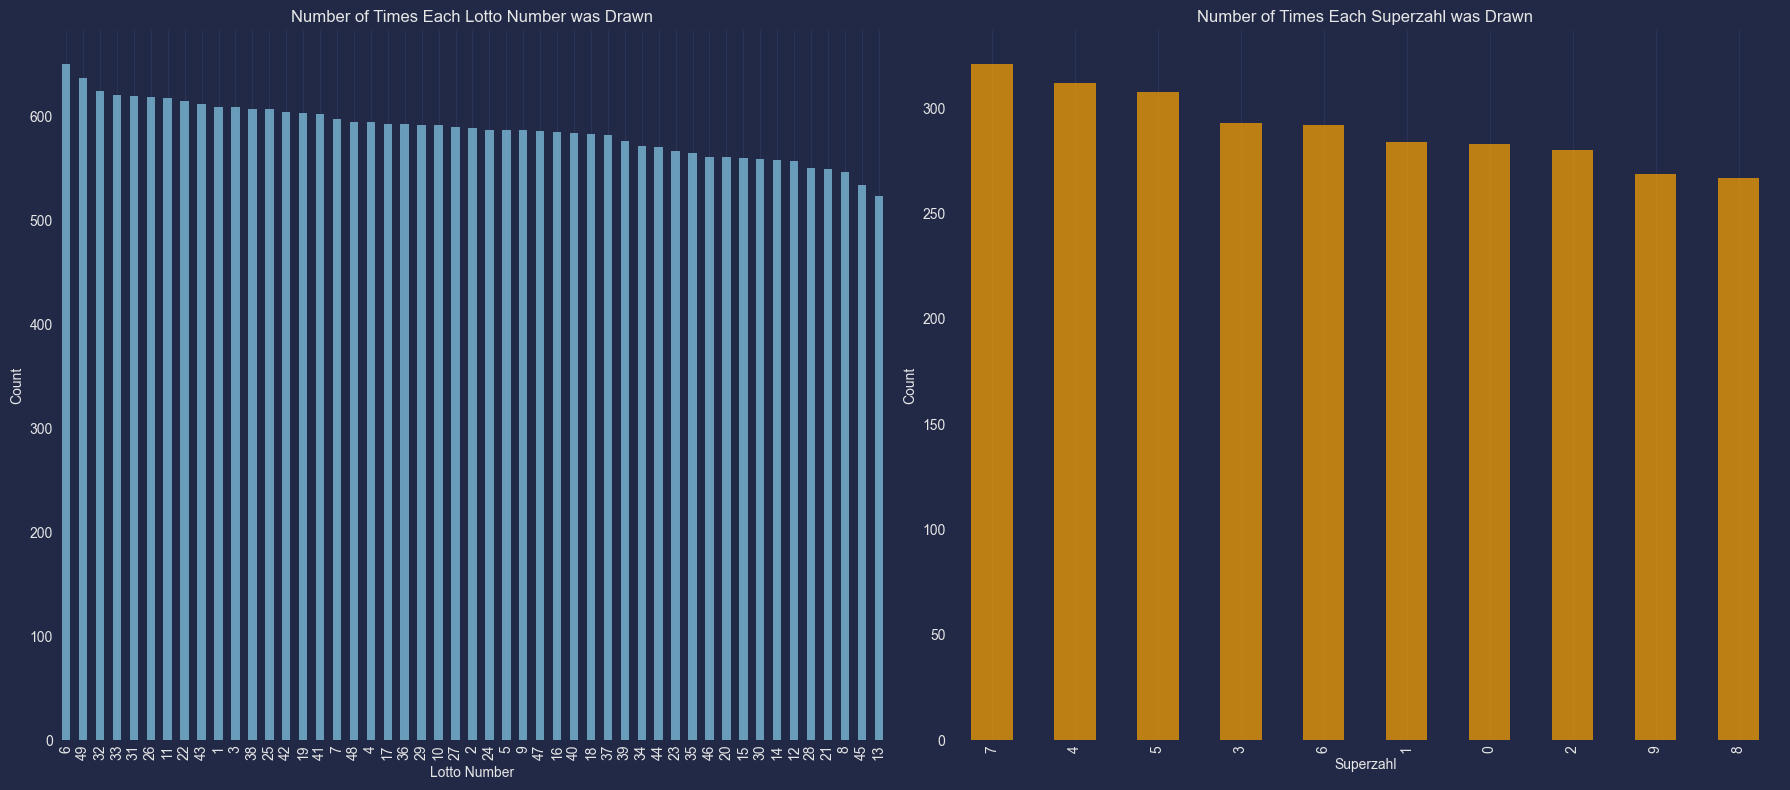

In [19]:
# Plot the counts of each number
plt.figure(figsize=(18, 8))

# Plot Lottozahl counts
plt.subplot(1, 2, 1)
number_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Number of Times Each Lotto Number was Drawn')
plt.xlabel('Lotto Number')
plt.ylabel('Count')
plt.grid(axis='y')

# Plot Superzahl counts
plt.subplot(1, 2, 2)
superzahl_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Number of Times Each Superzahl was Drawn')
plt.xlabel('Superzahl')
plt.ylabel('Count')
plt.grid(axis='y')

# Display the plot
plt.tight_layout()
plt.show()